In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_middle_motion = open('data_middle_motion.json')
data_much_motion = open('data_much_motion.json')
data_no_motion = open('data_no_motion.json')

data_middle_motion = json.load(data_middle_motion)

for message in data_middle_motion["messages"]:
    parsedPayload = json.loads(message["payload"])
    if "accel_x"  in parsedPayload:
        message["accel_x"] = parsedPayload["accel_x"]
    elif "accel_y"  in parsedPayload:
        message["accel_y"] = parsedPayload["accel_y"]
    elif "accel_z"  in parsedPayload:
        message["accel_z"] = parsedPayload["accel_z"]
    elif "temperature"  in parsedPayload:
        message["temperature"] = parsedPayload["temperature"]
    del message['payload']
    del message['retain']
    del message['qos']
    del message['out']
    del message['topic']


data_much_motion = json.load(data_much_motion)

for message in data_much_motion["messages"]:
    parsedPayload = json.loads(message["payload"])
    if "accel_x"  in parsedPayload:
        message["accel_x"] = parsedPayload["accel_x"]
    elif "accel_y"  in parsedPayload:
        message["accel_y"] = parsedPayload["accel_y"]
    elif "accel_z"  in parsedPayload:
        message["accel_z"] = parsedPayload["accel_z"]
    elif "temperature"  in parsedPayload:
        message["temperature"] = parsedPayload["temperature"]
    del message['payload']
    del message['retain']
    del message['qos']
    del message['out']
    del message['topic']

data_no_motion = json.load(data_no_motion)

for message in data_no_motion["messages"]:
    parsedPayload = json.loads(message["payload"])
    if "accel_x"  in parsedPayload:
        message["accel_x"] = parsedPayload["accel_x"]
    elif "accel_y"  in parsedPayload:
        message["accel_y"] = parsedPayload["accel_y"]
    elif "accel_z"  in parsedPayload:
        message["accel_z"] = parsedPayload["accel_z"]
    elif "temperature"  in parsedPayload:
        message["temperature"] = parsedPayload["temperature"]
    del message['payload']
    del message['retain']
    del message['qos']
    del message['out']
    del message['topic']


In [4]:
data_middle_motion = pd.DataFrame(data_middle_motion["messages"])
data_middle_motion['createAt'] =  pd.to_datetime(data_middle_motion['createAt'], format='%Y-%m-%d %H:%M:%S:%f')
data_middle_motion = data_middle_motion.sort_values(['id', 'createAt'])
data_middle_motion = (data_middle_motion.groupby(pd.Grouper(key='createAt', freq='3s'))
             .last()
             .reset_index()
         )
data_middle_motion  = data_middle_motion[data_middle_motion['id'].notna()]


In [5]:
data_much_motion = pd.DataFrame(data_much_motion["messages"])
data_much_motion['createAt'] =  pd.to_datetime(data_much_motion['createAt'], format='%Y-%m-%d %H:%M:%S:%f')
data_much_motion = data_much_motion.sort_values(['id', 'createAt'])
data_much_motion = (data_much_motion.groupby(pd.Grouper(key='createAt', freq='3s'))
             .last()
             .reset_index()
         )
data_much_motion  = data_much_motion[data_much_motion['id'].notna()]

In [6]:
data_no_motion = pd.DataFrame(data_no_motion["messages"])
data_no_motion['createAt'] =  pd.to_datetime(data_no_motion['createAt'], format='%Y-%m-%d %H:%M:%S:%f')
data_no_motion = data_no_motion.sort_values(['id', 'createAt'])
data_no_motion = (data_no_motion.groupby(pd.Grouper(key='createAt', freq='3s'))
             .last()
             .reset_index()
         )
data_no_motion  = data_no_motion[data_no_motion['id'].notna()]

In [82]:
data_no_motion.to_csv("data_no_motion.csv", encoding='utf-8', index=False)
data_much_motion.to_csv("data_much_motion.csv", encoding='utf-8', index=False)
data_middle_motion.to_csv("data_middle_motion.csv", encoding='utf-8', index=False)

<AxesSubplot:xlabel='createAt'>

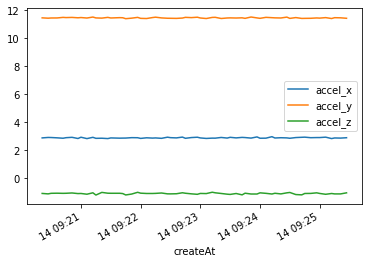

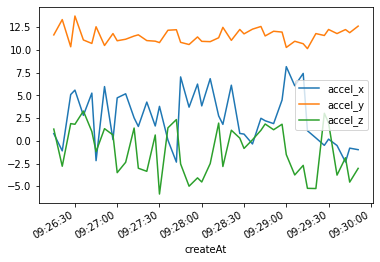

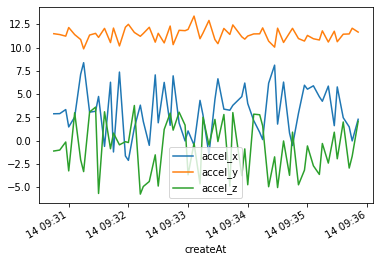

In [7]:
data_no_motion.plot(x="createAt",y=["accel_x","accel_y","accel_z"])
data_much_motion.plot(x="createAt",y=["accel_x","accel_y","accel_z"])
data_middle_motion.plot(x="createAt",y=["accel_x","accel_y","accel_z"])